# Importing Libraries

In [1]:
# Importing Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import entropy
from scipy import stats 
import numpy as np
import statsmodels.api as sm

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# Read Dataset into Pandas Dataframe


In [2]:
#Reading data into pandas df
df = pd.read_csv("https://raw.githubusercontent.com/chiraggarg95/DS-203-Assignments/Assignment_4/summer-products-with-rating-and-performance_2020-08.csv")

# Displaying part of Dataset

In [3]:
#Displaying part of dataset
df.head()

,title,title_orig,price,retail_price,currency_buyer,units_sold,uses_ad_boosts,rating,rating_count,rating_five_count,rating_four_count,rating_three_count,rating_two_count,rating_one_count,badges_count,badge_local_product,badge_product_quality,badge_fast_shipping,tags,product_color,product_variation_size_id,product_variation_inventory,shipping_option_name,shipping_option_price,shipping_is_express,countries_shipped_to,inventory_total,has_urgency_banner,urgency_text,origin_country,merchant_title,merchant_name,merchant_info_subtitle,merchant_rating_count,merchant_rating,merchant_id,merchant_has_profile_picture,merchant_profile_picture,product_url,product_picture,product_id,theme,crawl_month
0,2020 Summer Vintage Flamingo Print Pajamas Se...,2020 Summer Vintage Flamingo Print Pajamas Se...,16.00,14,EUR,100,0,3.76,54,26.0,8.0,10.0,1.0,9.0,0,0,0,0,"Summer,Fashion,womenunderwearsuit,printedpajam...",white,M,50,Livraison standard,4,0,34,50,1.0,Quantité limitée !,CN,zgrdejia,zgrdejia,(568 notes),568,4.128521,595097d6a26f6e070cb878d1,0,NaN,https://www.wish.com/c/5e9ae51d43d6a96e303acdb0,https://contestimg.wish.com/api/webimage/5e9ae...,5e9ae51d43d6a96e303acdb0,summer,2020-08
1,SSHOUSE Summer Casual Sleeveless Soirée Party ...,Women's Casual Summer Sleeveless Sexy Mini Dress,8.00,22,EUR,20000,1,3.45,6135,2269.0,1027.0,1118.0,644.0,1077.0,0,0,0,0,"Mini,womens dresses,Summer,Patchwork,fashion d...",green,XS,50,Livraison standard,2,0,41,50,1.0,Quantité limitée !,CN,SaraHouse,sarahouse,"83 % avis positifs (17,752 notes)",17752,3.899673,56458aa03a698c35c9050988,0,NaN,https://www.wish.com/c/58940d436a0d3d5da4e95a38,https://contestimg.wish.com/api/webimage/58940...,58940d436a0d3d5da4e95a38,summer,2020-08
2,2020 Nouvelle Arrivée Femmes Printemps et Été ...,2020 New Arrival Women Spring and Summer Beach...,8.00,43,EUR,100,0,3.57,14,5.0,4.0,2.0,0.0,3.0,0,0,0,0,"Summer,cardigan,women beachwear,chiffon,Sexy w...",leopardprint,XS,1,Livraison standard,3,0,36,50,1.0,Quantité limitée !,CN,hxt520,hxt520,86 % avis positifs (295 notes),295,3.989831,5d464a1ffdf7bc44ee933c65,0,NaN,https://www.wish.com/c/5ea10e2c617580260d55310a,https://contestimg.wish.com/api/webimage/5ea10...,5ea10e2c617580260d55310a,summer,2020-08
3,Hot Summer Cool T-shirt pour les femmes Mode T...,Hot Summer Cool T Shirt for Women Fashion Tops...,8.00,8,EUR,5000,1,4.03,579,295.0,119.0,87.0,42.0,36.0,0,0,0,0,"Summer,Shorts,Cotton,Cotton T Shirt,Sleeve,pri...",black,M,50,Livraison standard,2,0,41,50,NaN,NaN,CN,allenfan,allenfan,"(23,832 notes)",23832,4.020435,58cfdefdacb37b556efdff7c,0,NaN,https://www.wish.com/c/5cedf17ad1d44c52c59e4aca,https://contestimg.wish.com/api/webimage/5cedf...,5cedf17ad1d44c52c59e4aca,summer,2020-08
4,Femmes Shorts d'été à lacets taille élastique ...,Women Summer Shorts Lace Up Elastic Waistband ...,2.72,3,EUR,100,1,3.10,20,6.0,4.0,2.0,2.0,6.0,0,0,0,0,"Summer,Plus Size,Lace,Casual pants,Bottom,pant...",yellow,S,1,Livraison standard,1,0,35,50,1.0,Quantité limitée !,CN,youngpeopleshop,happyhorses,"85 % avis positifs (14,482 notes)",14482,4.001588,5ab3b592c3911a095ad5dadb,0,NaN,https://www.wish.com/c/5ebf5819ebac372b070b0e70,https://contestimg.wish.com/api/webimage/5ebf5...,5ebf5819ebac372b070b0e70,summer,2020-08


# Number of records and variables



In [4]:
#getting number of records and variables
records = df.shape[0]
variables = df.shape[1]
print("The data has " + str(records) + " records and " + str(variables) + " variables.")

The data has 1573 records and 43 variables.


# List of variables

In [5]:
#getting the variable names
print("The following variables are available in the dataset: ")
i=0
for var in list(df.columns):
    print(var)

The following variables are available in the dataset: 
title
title_orig
price
retail_price
currency_buyer
units_sold
uses_ad_boosts
rating
rating_count
rating_five_count
rating_four_count
rating_three_count
rating_two_count
rating_one_count
badges_count
badge_local_product
badge_product_quality
badge_fast_shipping
tags
product_color
product_variation_size_id
product_variation_inventory
shipping_option_name
shipping_option_price
shipping_is_express
countries_shipped_to
inventory_total
has_urgency_banner
urgency_text
origin_country
merchant_title
merchant_name
merchant_info_subtitle
merchant_rating_count
merchant_rating
merchant_id
merchant_has_profile_picture
merchant_profile_picture
product_url
product_picture
product_id
theme
crawl_month


# Datatype of Variables

In [6]:
#getting datatype of each variable
print("The following are the python datatypes of the variables available in the dataset: ")
df.dtypes

The following are the python datatypes of the variables available in the dataset: 


title                            object
title_orig                       object
price                           float64
retail_price                      int64
currency_buyer                   object
units_sold                        int64
uses_ad_boosts                    int64
rating                          float64
rating_count                      int64
rating_five_count               float64
rating_four_count               float64
rating_three_count              float64
rating_two_count                float64
rating_one_count                float64
badges_count                      int64
badge_local_product               int64
badge_product_quality             int64
badge_fast_shipping               int64
tags                             object
product_color                    object
product_variation_size_id        object
product_variation_inventory       int64
shipping_option_name             object
shipping_option_price             int64
shipping_is_express               int64


# Cleaning up of some columns

## Replacing NaN values in "has_urgency_banner" to 0.0

In [7]:
df['has_urgency_banner'] = df['has_urgency_banner'].fillna(0) # replacing null values by 0
df['has_urgency_banner'].isna().sum()  # No. of null values in "has_urgency_banner"

0

## Replacing NaN values in rating count to 0.0

In [8]:
 # replacing null values by 0
df['rating_five_count'] = df['rating_five_count'].fillna(0)
df['rating_four_count'] = df['rating_four_count'].fillna(0)
df['rating_three_count'] = df['rating_three_count'].fillna(0)
df['rating_two_count'] = df['rating_two_count'].fillna(0)
df['rating_one_count'] = df['rating_one_count'].fillna(0)

## Replacing NaN values in "urgency_text" to empty string

In [9]:
df['urgency_text'] = df['urgency_text'].fillna("") # replacing null values by empty string
df['has_urgency_banner'].isna().sum()  # No. of null values in "urgency_text"

0

## Replacing NaN values in "merchant_profile_picture", "merchant_name", "merchant_info_subtitle" to Not Available

In [10]:
df['merchant_profile_picture'] = df['merchant_profile_picture'].fillna("Not Available") # replacing null values by Not Available
df['merchant_name'] = df['merchant_name'].fillna("Not Available") # replacing null values by Not Available
df['merchant_info_subtitle'] = df['merchant_info_subtitle'].fillna("Not Available") # replacing null values by Not Available


# Unique Values

In [11]:
#getting number of unique values for each variable
print("The number of unique values are: ")
for col in df.columns:
    print(col + ": " + str(df[col].nunique()))

The number of unique values are: 
title: 1201
title_orig: 1203
price: 127
retail_price: 104
currency_buyer: 1
units_sold: 15
uses_ad_boosts: 2
rating: 192
rating_count: 761
rating_five_count: 605
rating_four_count: 440
rating_three_count: 384
rating_two_count: 262
rating_one_count: 330
badges_count: 4
badge_local_product: 2
badge_product_quality: 2
badge_fast_shipping: 2
tags: 1230
product_color: 101
product_variation_size_id: 106
product_variation_inventory: 48
shipping_option_name: 15
shipping_option_price: 8
shipping_is_express: 2
countries_shipped_to: 94
inventory_total: 10
has_urgency_banner: 2
urgency_text: 3
origin_country: 6
merchant_title: 958
merchant_name: 958
merchant_info_subtitle: 1059
merchant_rating_count: 917
merchant_rating: 952
merchant_id: 958
merchant_has_profile_picture: 2
merchant_profile_picture: 126
product_url: 1341
product_picture: 1341
product_id: 1341
theme: 1
crawl_month: 1


# Number of Missing entries for each variable

In [12]:
# getting Number of Missing entries for each variable
print("The number of missing values are: ")
for col in df.columns:
    print(col + ": " + str(df[col].isna().sum()))

The number of missing values are: 
title: 0
title_orig: 0
price: 0
retail_price: 0
currency_buyer: 0
units_sold: 0
uses_ad_boosts: 0
rating: 0
rating_count: 0
rating_five_count: 0
rating_four_count: 0
rating_three_count: 0
rating_two_count: 0
rating_one_count: 0
badges_count: 0
badge_local_product: 0
badge_product_quality: 0
badge_fast_shipping: 0
tags: 0
product_color: 41
product_variation_size_id: 14
product_variation_inventory: 0
shipping_option_name: 0
shipping_option_price: 0
shipping_is_express: 0
countries_shipped_to: 0
inventory_total: 0
has_urgency_banner: 0
urgency_text: 0
origin_country: 17
merchant_title: 0
merchant_name: 0
merchant_info_subtitle: 0
merchant_rating_count: 0
merchant_rating: 0
merchant_id: 0
merchant_has_profile_picture: 0
merchant_profile_picture: 0
product_url: 0
product_picture: 0
product_id: 0
theme: 0
crawl_month: 0


# Number of Records with no missing entries

In [13]:
# getting Number of Records with no missing entries
print("The number of records with no missing entries are: " + str((df.isna().sum(axis=1) == 0).sum()))

The number of records with no missing entries are: 1503


# Final Classification of variables

#### Note: Here some variables are regarded as non-EDA variables as they cannot be used for effective Exploratory Data Analysis. However, they are not dropped from the data as they can be valuable for other information purposes.


In [14]:
non_EDA_var = np.array([
                'title', 'title_orig', 'currency_buyer', 'tags', 'shipping_option_name', 'urgency_text', 'inventory_total', 'merchant_title', 'merchant_name', 'merchant_info_subtitle',  
                'merchant_id', 'merchant_profile_picture', 'product_url', 'product_picture', 'product_id', 'theme',  'crawl_month'
])

disc_var = np.array([
            'uses_ad_boosts', 'badges_count', 'badge_local_product', 'badge_product_quality', 'badge_fast_shipping', 'product_color', 'product_variation_size_id',
             'product_variation_inventory',  'shipping_option_price', 'shipping_is_express', 'has_urgency_banner', 'origin_country', 'merchant_has_profile_picture',
])

cont_var = np.array([
            'price', 'retail_price', 'units_sold', 'rating', 'rating_count', 'rating_five_count', 'rating_four_count', 'rating_three_count', 'rating_two_count',
             'rating_one_count', 'countries_shipped_to', 'merchant_rating_count', 'merchant_rating',
])

# Final Data types of variables

<table>
        <tr>
            <th>Column Name</th>
            <th>Discrete/Continuous</th>
            <th>Other</th>
        </tr>
        <tr>
            <td>price</td>
            <td>C</td>
            <td>Quantised Continuous</td>
        </tr>        
        <tr>
            <td>retail_price</td>
            <td>C</td>
            <td>Quantised Continuous</td>
        </tr>        
        <tr>
            <td>units_sold</td>
            <td>C</td>
            <td>Quantised Continuous</td>
        </tr>        
        <tr>
            <td>uses_ad_boosts</td>
            <td>D</td>
            <td>Categorical</td>
        </tr>
        <tr>
            <td>rating</td>
            <td>C</td>
            <td>Float Continuous</td>
        </tr>                
        <tr>
            <td>rating_count</td>
            <td>C</td>
            <td>Quantised Continuous</td>
        </tr>
        <tr>
            <td>rating_five_count</td>
            <td>C</td>
            <td>Quantised Continuous</td>
        </tr>
        <tr>
            <td>rating_four_count</td>
            <td>C</td>
            <td>Quantised Continuous</td>
        </tr>
        <tr>
            <td>rating_three_count</td>
            <td>C</td>
            <td>Quantised Continuous</td>
        </tr>
        <tr>
            <td>rating_two_count</td>
            <td>C</td>
            <td>Quantised Continuous</td>
        </tr>
        <tr>
            <td>rating_one_count</td>
            <td>C</td>
            <td>Quantised Continuous</td>
        </tr>
        <tr>
            <td>badges_count</td>
            <td>D</td>
            <td>Ordinal</td>
        </tr>
        <tr>
            <td>badge_local_product</td>
            <td>D</td>
            <td>Ordinal</td>
        </tr>
        <tr>
            <td>badge_product_quality</td>
            <td>D</td>
            <td>Ordinal</td>
        </tr>
        <tr>
            <td>badge_fast_shipping</td>
            <td>D</td>
            <td>Ordinal</td>
        </tr>
        <tr>
            <td>product_color</td>
            <td>D</td>
            <td>Categorical</td>
        </tr>
        <tr>
            <td>product_variation_size_id</td>
            <td>D</td>
            <td>Ordinal</td>
        </tr>
        <tr>
            <td>product_variation_inventory</td>
            <td>D</td>
            <td>Categorical</td>
        </tr>
        <tr>
            <td>shipping_option_price</td>
            <td>D</td>
            <td>Ordinal</td>
        </tr>
        <tr>
            <td>shipping_is_express</td>
            <td>D</td>
            <td>Categorical</td>
        </tr>
        <tr>
            <td>countries_shipped_to</td>
            <td>C</td>
            <td>Quantised Continuous</td>
        </tr>
        <tr>
            <td>has_urgency_banner</td>
            <td>D</td>
            <td>Categorical</td>
        </tr>
        <tr>
            <td>origin_country</td>
            <td>D</td>
            <td>Categorical</td>
        </tr>
        <tr>
            <td>merchant_rating_count</td>
            <td>C</td>
            <td>Quantised Continuous</td>
        </tr>
        <tr>
            <td>merchant_rating</td>
            <td>C</td>
            <td>Float Continuous</td>
        </tr>
        <tr>
            <td>merchant_has_profile_picture</td>
            <td>D</td>
            <td>Categorical</td>
        </tr>
    </table>


# Observing Final variable distribution

In [15]:
print("The number of non-EDA variables are: " + str(non_EDA_var.shape[0]))
print("The number of discrete variables are: " + str(disc_var.shape[0]))
print("The number of continuous variables are: " + str(cont_var.shape[0]))

The number of non-EDA variables are: 17
The number of discrete variables are: 13
The number of continuous variables are: 13


In [16]:
print("The non-EDA variables are:")
print(non_EDA_var)
print()
print("The discrete variables are:")
print(disc_var)
print()
print("The continuous variables are:")
print(cont_var)

The non-EDA variables are:
['title' 'title_orig' 'currency_buyer' 'tags' 'shipping_option_name'
 'urgency_text' 'inventory_total' 'merchant_title' 'merchant_name'
 'merchant_info_subtitle' 'merchant_id' 'merchant_profile_picture'
 'product_url' 'product_picture' 'product_id' 'theme' 'crawl_month']

The discrete variables are:
['uses_ad_boosts' 'badges_count' 'badge_local_product'
 'badge_product_quality' 'badge_fast_shipping' 'product_color'
 'product_variation_size_id' 'product_variation_inventory'
 'shipping_option_price' 'shipping_is_express' 'has_urgency_banner'
 'origin_country' 'merchant_has_profile_picture']

The continuous variables are:
['price' 'retail_price' 'units_sold' 'rating' 'rating_count'
 'rating_five_count' 'rating_four_count' 'rating_three_count'
 'rating_two_count' 'rating_one_count' 'countries_shipped_to'
 'merchant_rating_count' 'merchant_rating']


# Converting variables to correct data types

In [17]:
# Finding out the variables which have Dtype float or integer.
numeric_col = []
for var in df.columns.values:
  if df[var].dtype != 'object':
    numeric_col.append(var)

print(len(numeric_col))
print(numeric_col)

24
['price', 'retail_price', 'units_sold', 'uses_ad_boosts', 'rating', 'rating_count', 'rating_five_count', 'rating_four_count', 'rating_three_count', 'rating_two_count', 'rating_one_count', 'badges_count', 'badge_local_product', 'badge_product_quality', 'badge_fast_shipping', 'product_variation_inventory', 'shipping_option_price', 'shipping_is_express', 'countries_shipped_to', 'inventory_total', 'has_urgency_banner', 'merchant_rating_count', 'merchant_rating', 'merchant_has_profile_picture']


In [18]:
for var in numeric_col:
  df[var]=pd.to_numeric(df[var])

In [19]:
for var in ['product_color','origin_country','product_variation_size_id']:
  df[var]=df[var].astype(str)

# Discrete Variables

## Histograms

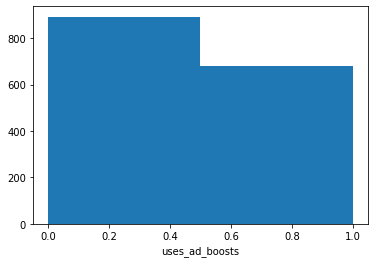

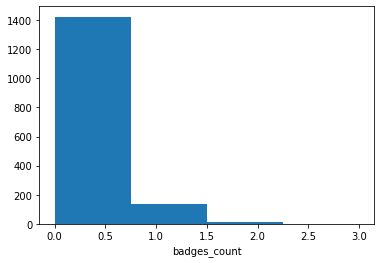

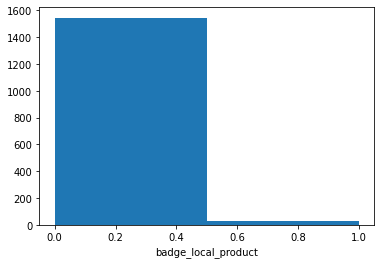

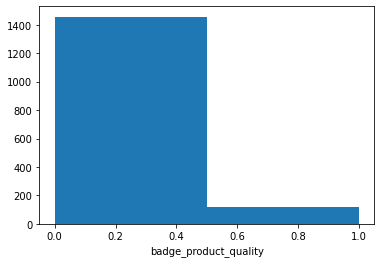

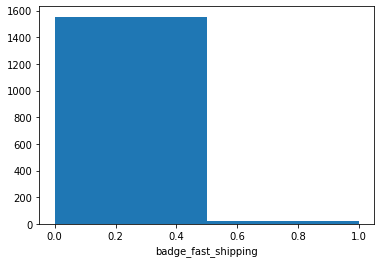

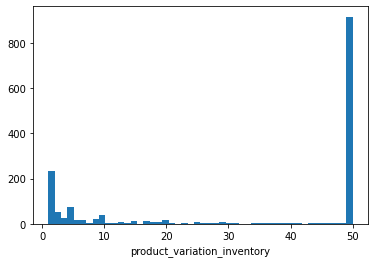

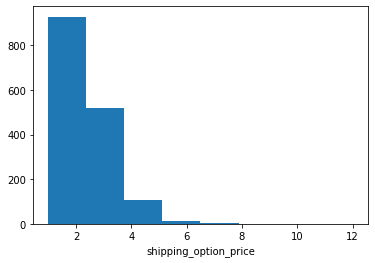

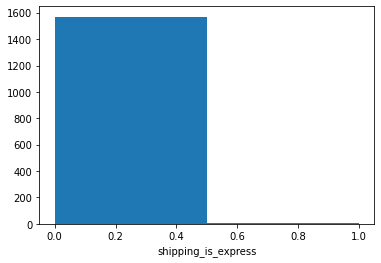

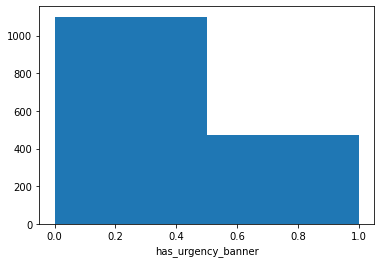

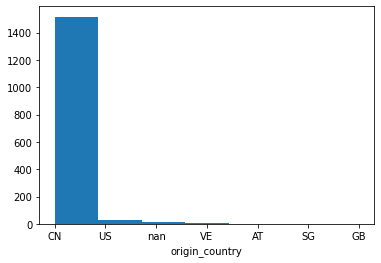

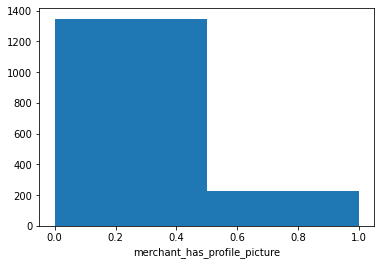

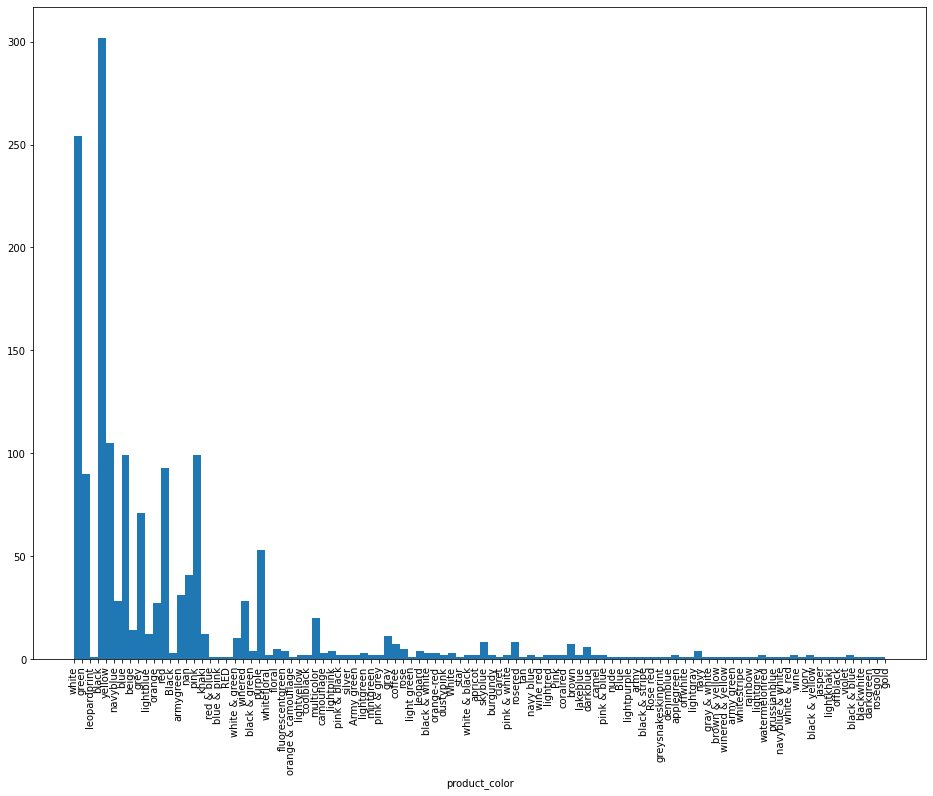

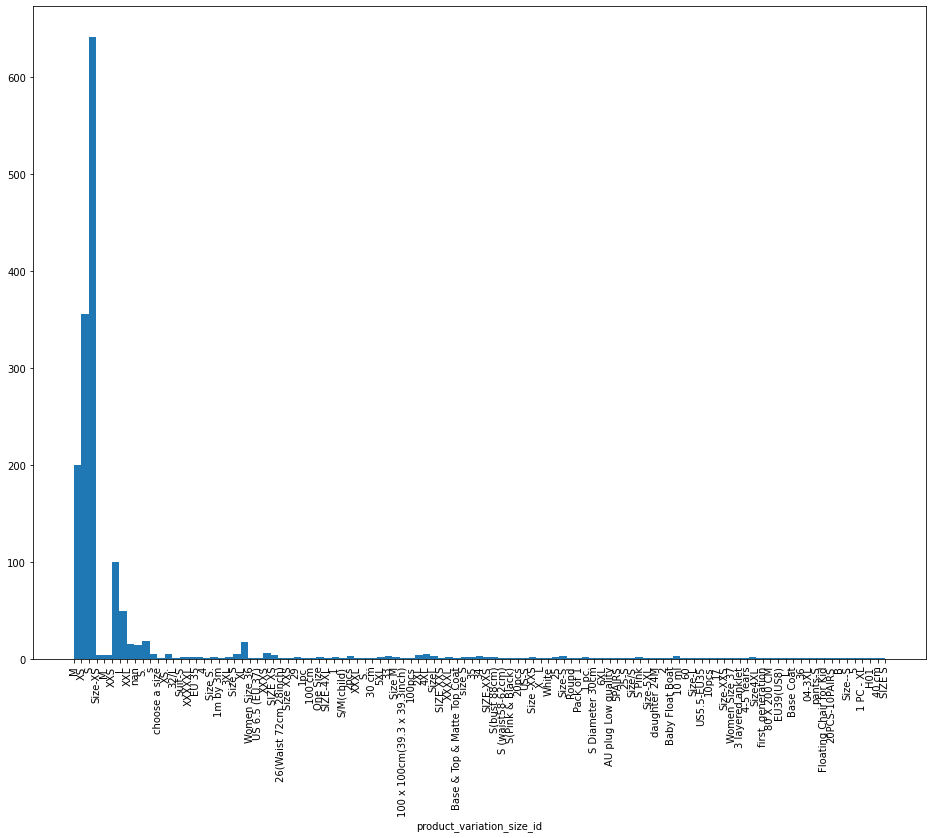

In [20]:
for var in disc_var:
  
  if var not in ['product_color','product_variation_size_id']:                  
    plt.hist(df[var], bins = len(pd.unique(df[var])))
    plt.xlabel(var)
    plt.show()

for var in ['product_color','product_variation_size_id']:
    plt.figure(figsize=(16,12))
    plt.xticks(Rotation=90)  
    plt.xlabel(var)
    plt.hist(df[var], bins = len(pd.unique(df[var])))
    plt.show()

## Finding the Mode value


In [21]:
#getting mode for each variable

for var in disc_var:
    print("The mode value(s) of " + var + "  are: ")
    for mode in df[var].mode():
        print(mode)
    print()

The mode value(s) of uses_ad_boosts  are: 
0

The mode value(s) of badges_count  are: 
0

The mode value(s) of badge_local_product  are: 
0

The mode value(s) of badge_product_quality  are: 
0

The mode value(s) of badge_fast_shipping  are: 
0

The mode value(s) of product_color  are: 
black

The mode value(s) of product_variation_size_id  are: 
S

The mode value(s) of product_variation_inventory  are: 
50

The mode value(s) of shipping_option_price  are: 
2

The mode value(s) of shipping_is_express  are: 
0

The mode value(s) of has_urgency_banner  are: 
0.0

The mode value(s) of origin_country  are: 
CN

The mode value(s) of merchant_has_profile_picture  are: 
0



## Getting the Entropy Values

In [22]:
#getting entropy values for discrete variables
print("The entropy values for the discrete variables are as follows: ")
for var in disc_var:
    print(var + ": " + str(entropy(df[var].value_counts(), base=2)))
    print()

The entropy values for the discrete variables are as follows: 
uses_ad_boosts: 0.986981471903206

badges_count: 0.5019223458802726

badge_local_product: 0.1325673454979398

badge_product_quality: 0.3820609539404418

badge_fast_shipping: 0.09829445856811768

product_color: 4.402010218617139

product_variation_size_id: 3.065985740421459

product_variation_inventory: 2.775239635022248

shipping_option_price: 1.9303311342286178

shipping_is_express: 0.025582103284125884

has_urgency_banner: 0.8821440400674617

origin_country: 0.285663720663582

merchant_has_profile_picture: 0.5937817055914307



# Continuous Variables

## Some statistics for continuous variables

#### Note: Here 25%, 50%, 75% represent 25th percentile,  50th percentile, 75th percentile respectively


In [23]:
#getting stats for continuous variables
for var in cont_var:
    print("Following are some statistics for " + var + ": ")
    for key in df[var].describe().keys():
        print(key + ": " + str(df[var].describe()[key]))
    print("Inter quartile range" + ": " + str(stats.iqr(df[var], interpolation='midpoint')))
    print("Variance" + ": " + str(df[var].var()))
    print("Skew" + ": " + str(df[var].skew()))
    print("Median" + ": " + str(df[var].median()))
    print()

Following are some statistics for price: 
count: 1573.0
mean: 8.325371900826434
std: 3.9320298149036783
min: 1.0
25%: 5.8100000000000005
50%: 8.0
75%: 11.0
max: 49.0
Inter quartile range: 5.1899999999999995
Variance: 15.460858465291455
Skew: 1.31589130005404
Median: 8.0

Following are some statistics for retail_price: 
count: 1573.0
mean: 23.28862047043865
std: 30.35786308915618
min: 1.0
25%: 7.0
50%: 10.0
75%: 26.0
max: 252.0
Inter quartile range: 19.0
Variance: 921.5998513399511
Skew: 2.742709301648266
Median: 10.0

Following are some statistics for units_sold: 
count: 1573.0
mean: 4339.005085823268
std: 9356.539302069335
min: 1.0
25%: 100.0
50%: 1000.0
75%: 5000.0
max: 100000.0
Inter quartile range: 4900.0
Variance: 87544827.71116813
Skew: 5.624840137689019
Median: 1000.0

Following are some statistics for rating: 
count: 1573.0
mean: 3.8208963763509174
std: 0.5153735990855995
min: 1.0
25%: 3.55
50%: 3.85
75%: 4.11
max: 5.0
Inter quartile range: 0.5600000000000005
Variance: 0.265609

## Box and whiskers plots for continuous variables

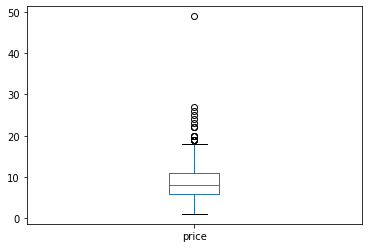

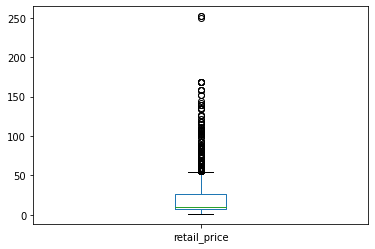

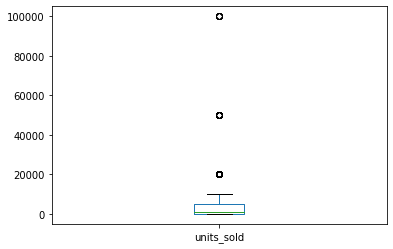

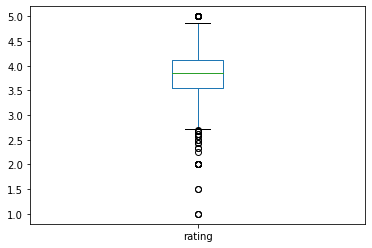

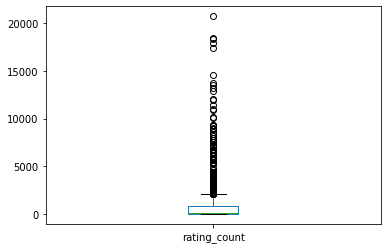

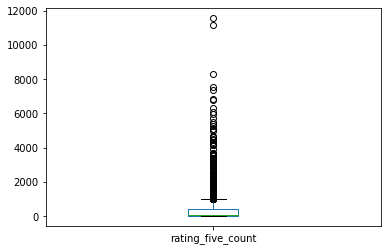

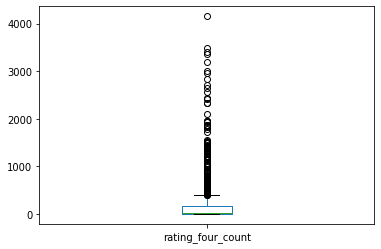

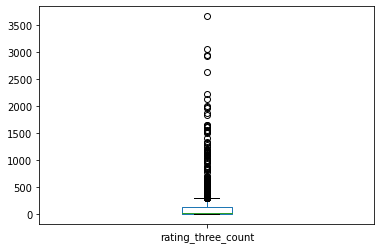

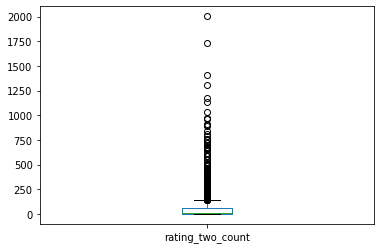

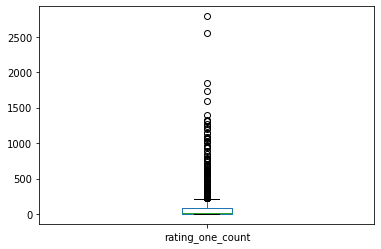

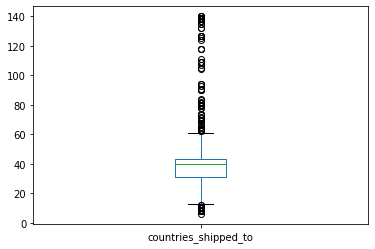

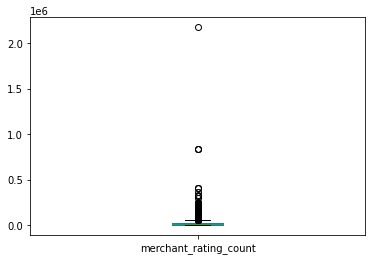

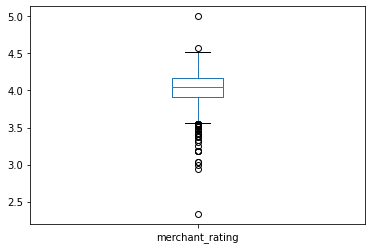

In [24]:
for var in cont_var:
    df[var].plot.box()
    plt.show()

## Histogram for continuous variables


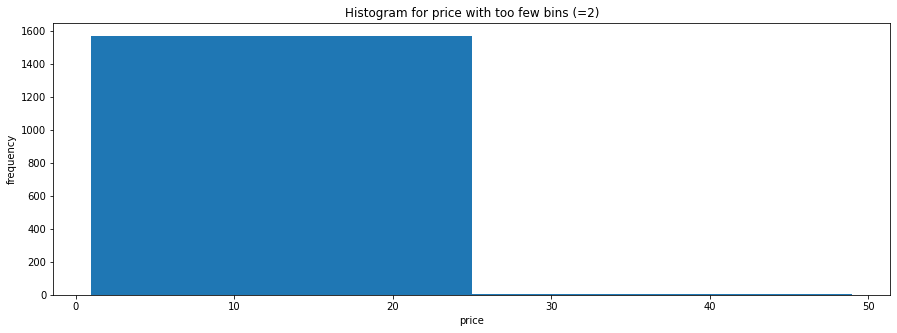

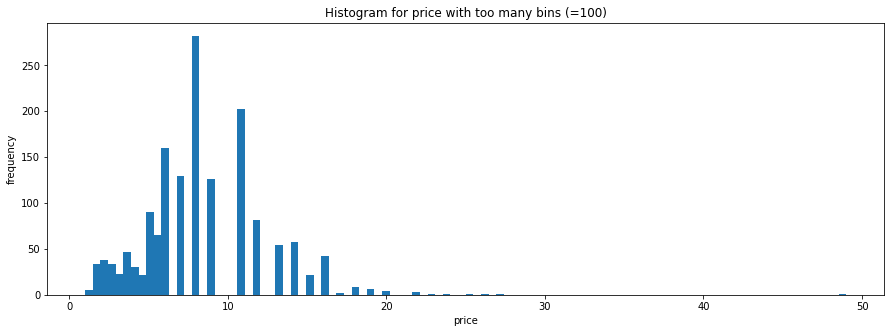

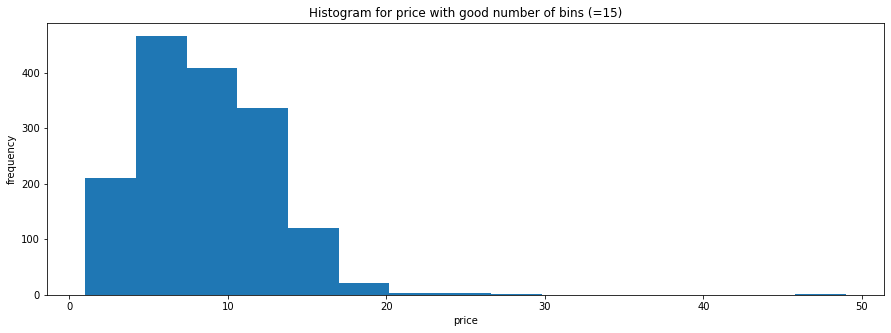

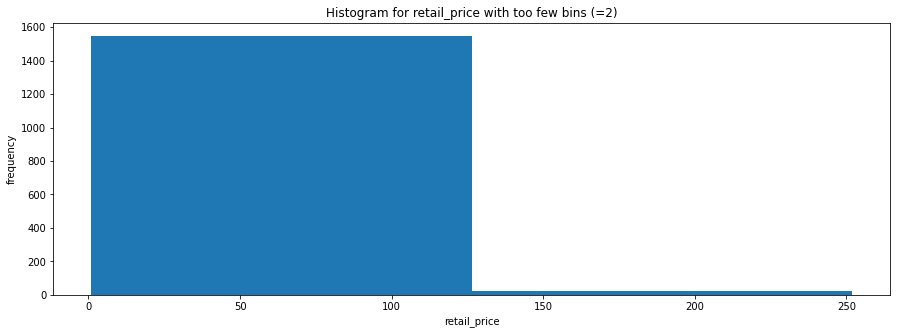

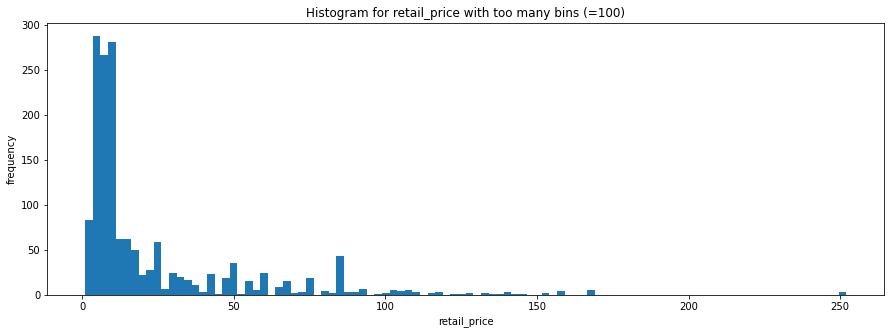

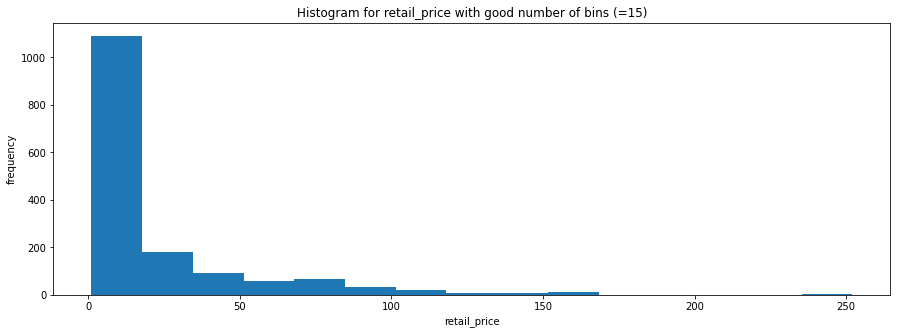

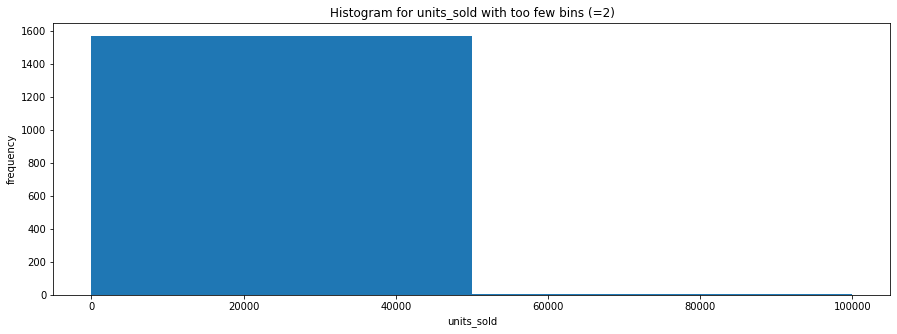

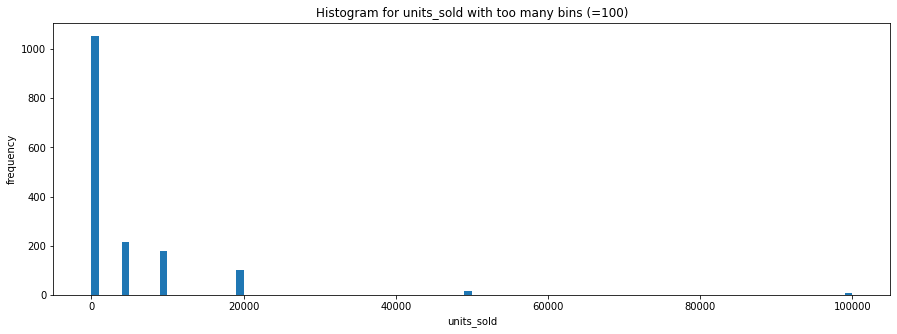

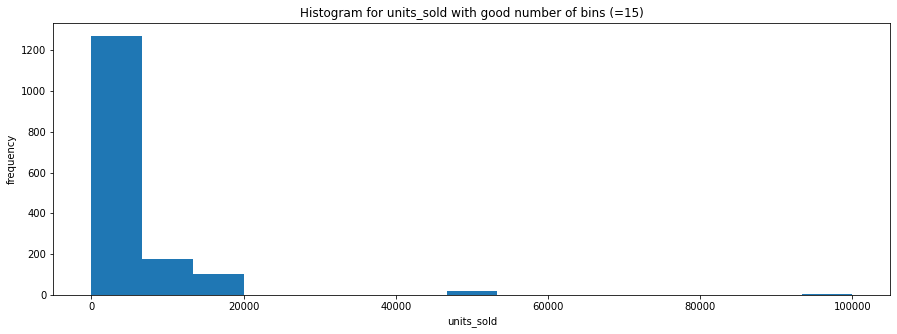

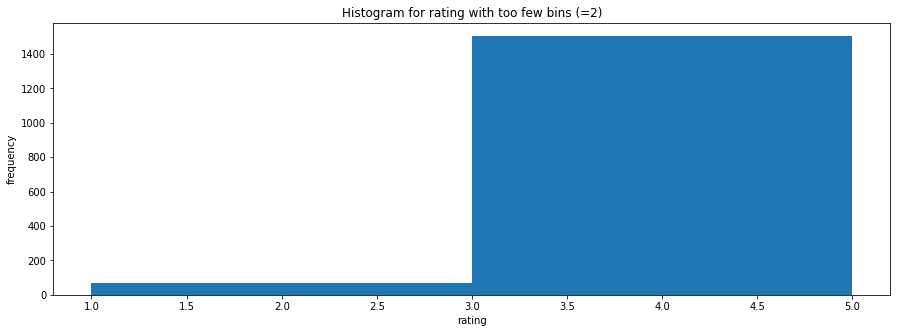

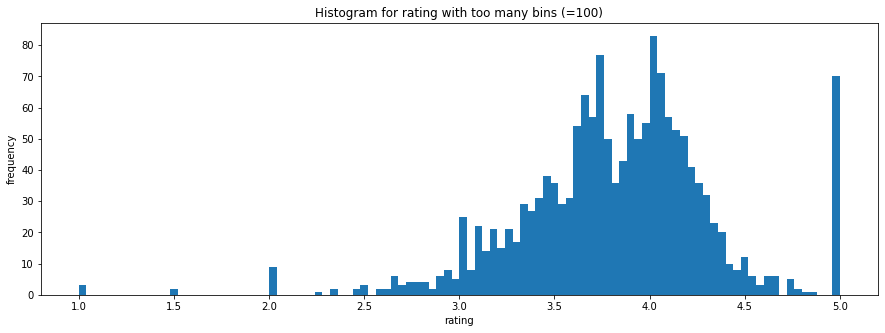

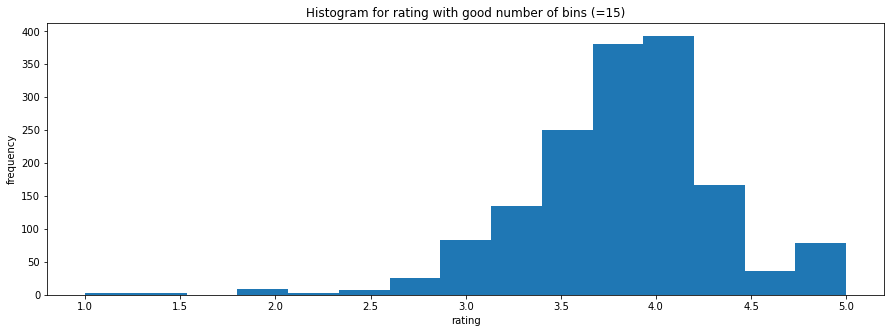

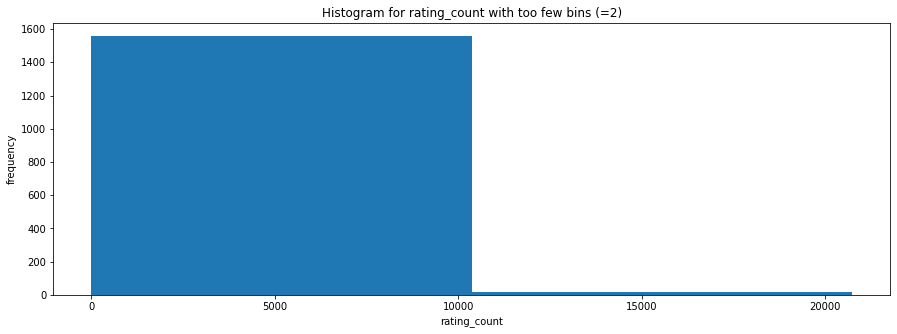

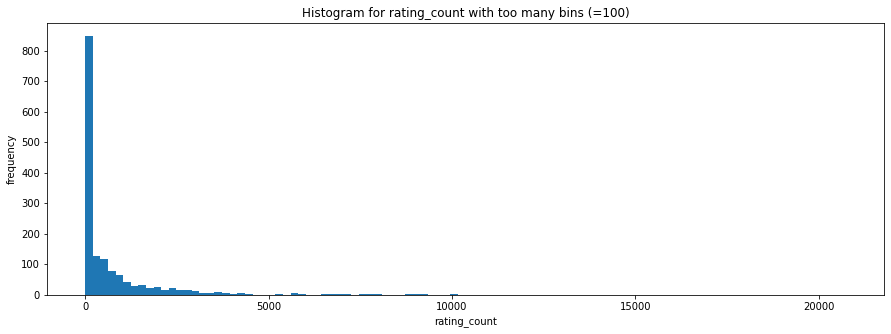

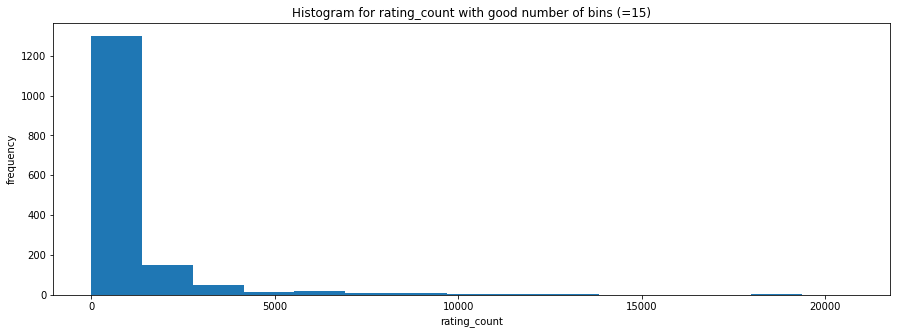

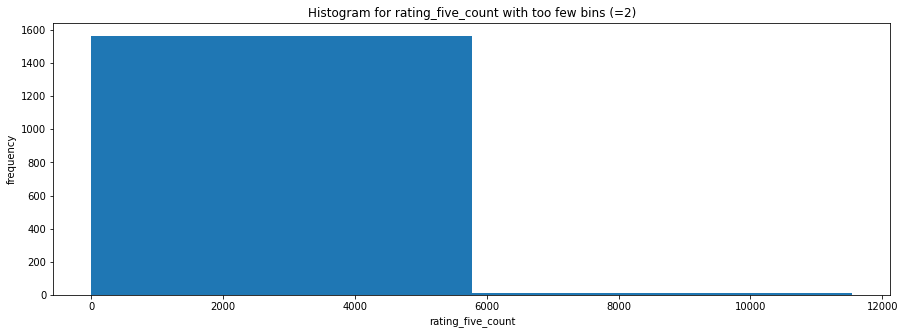

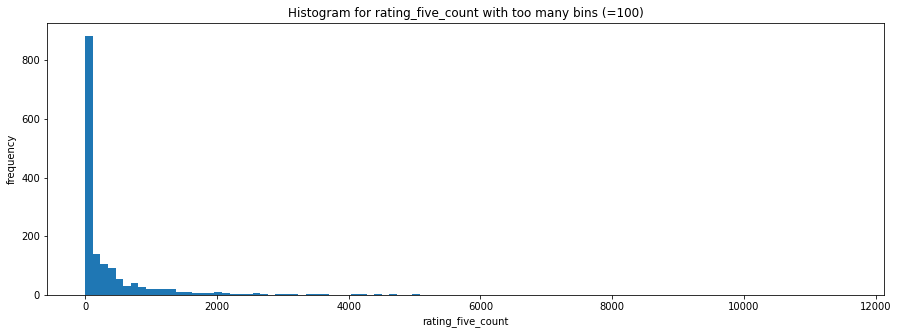

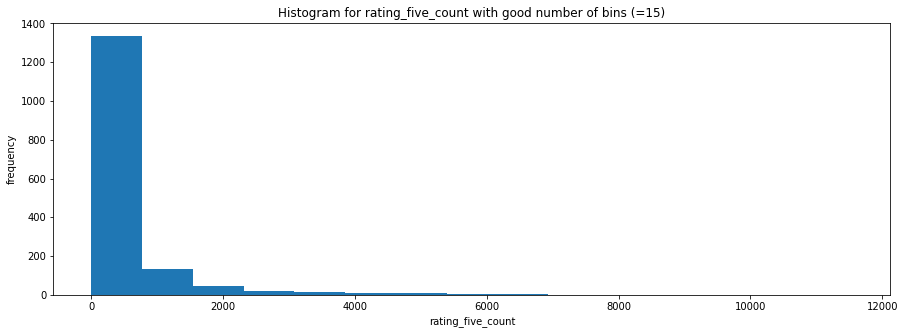

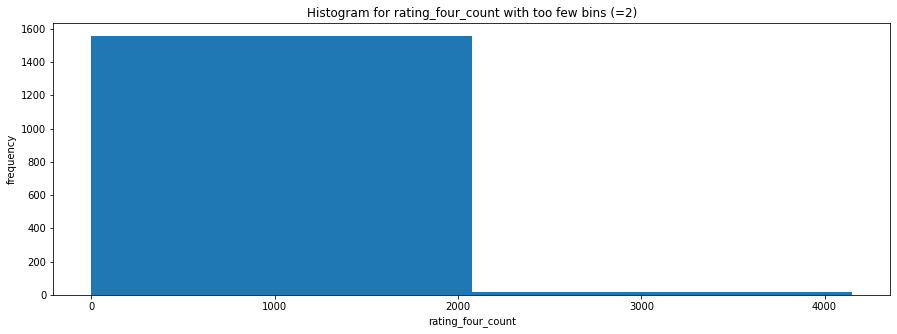

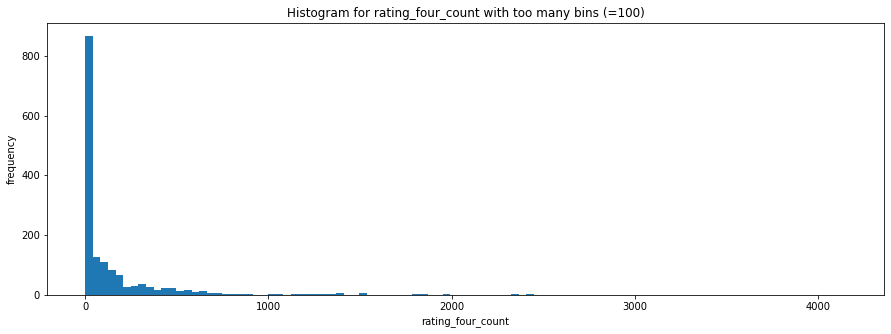

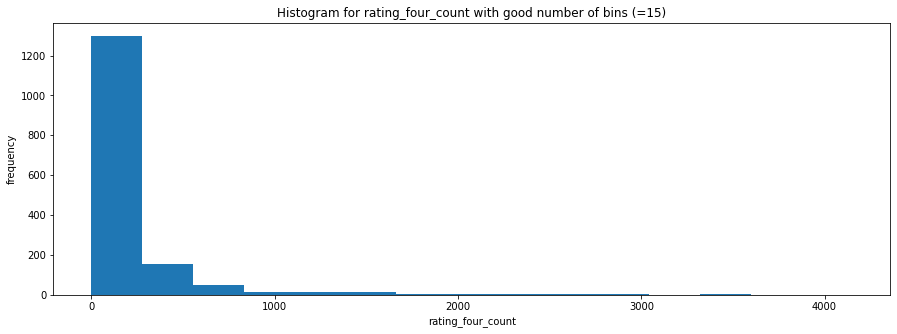

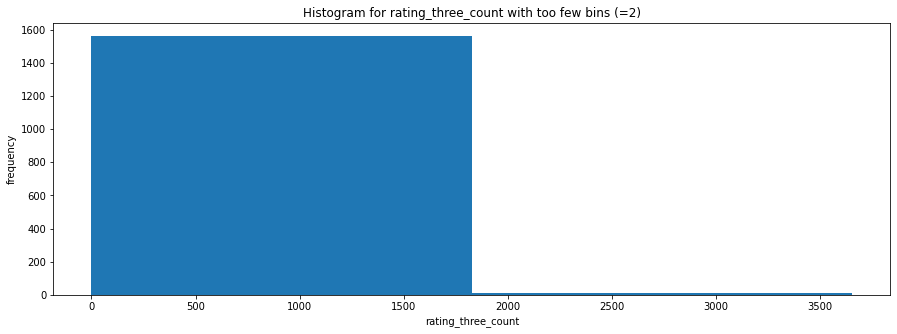

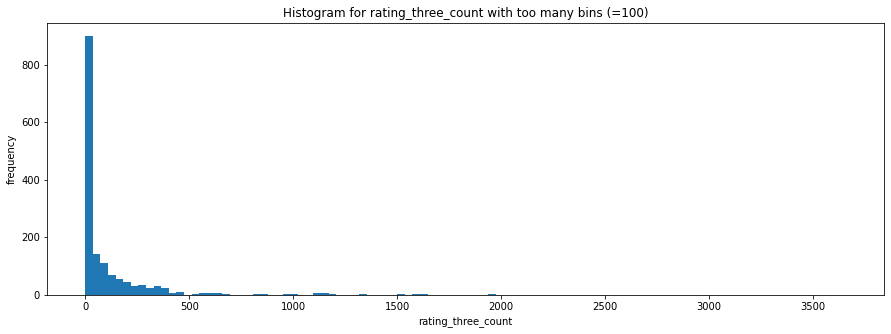

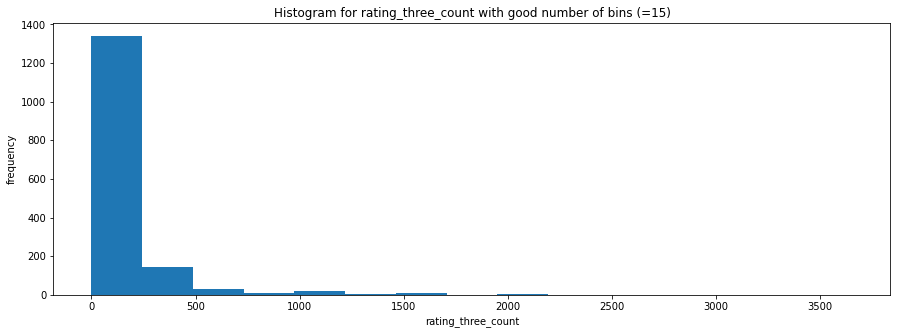

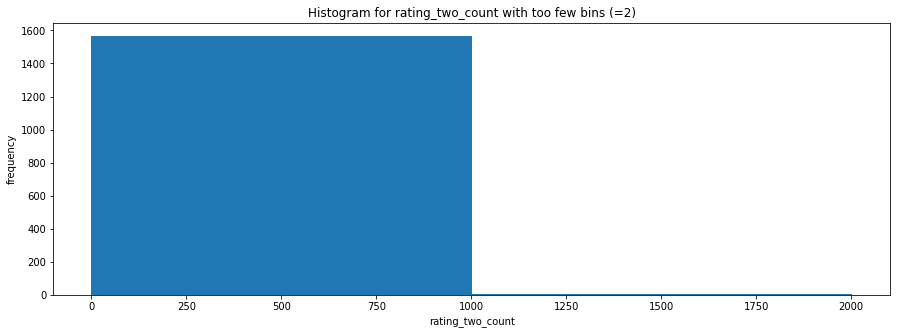

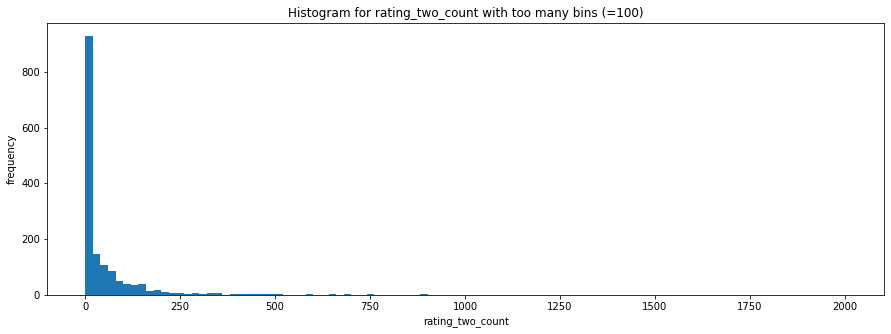

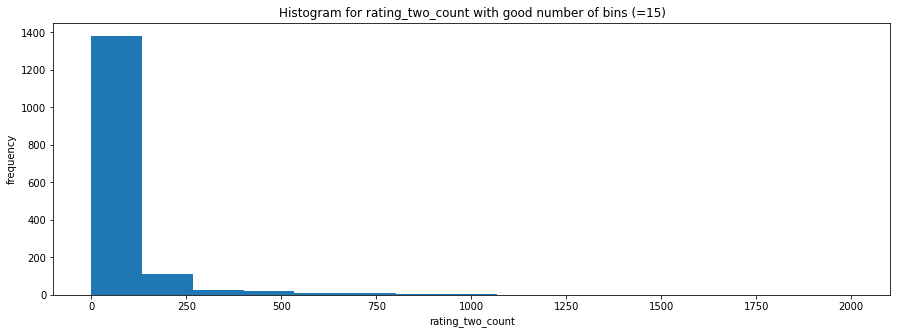

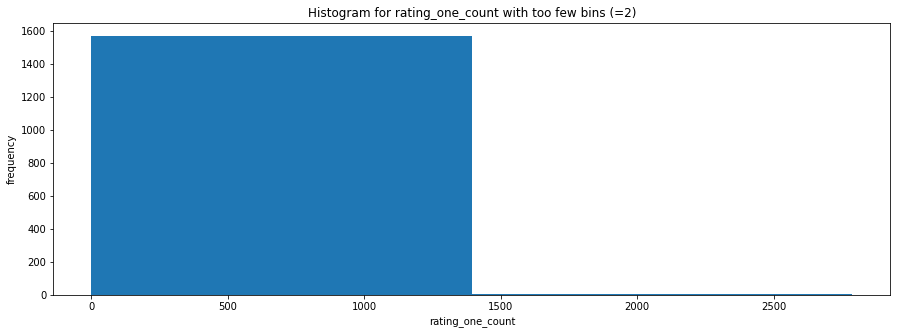

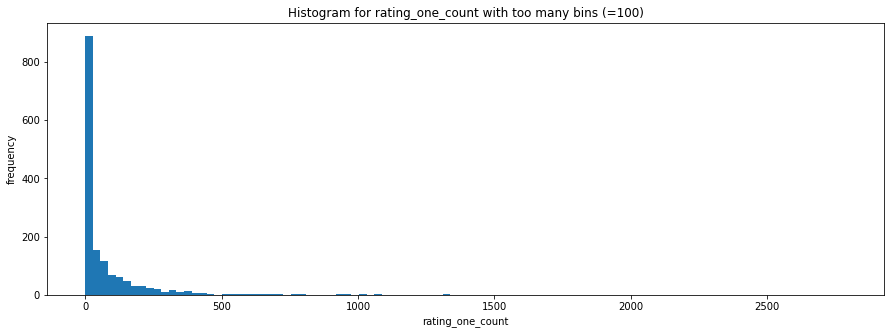

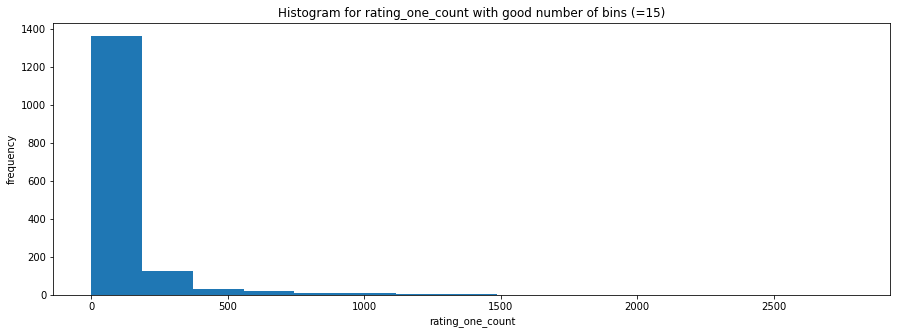

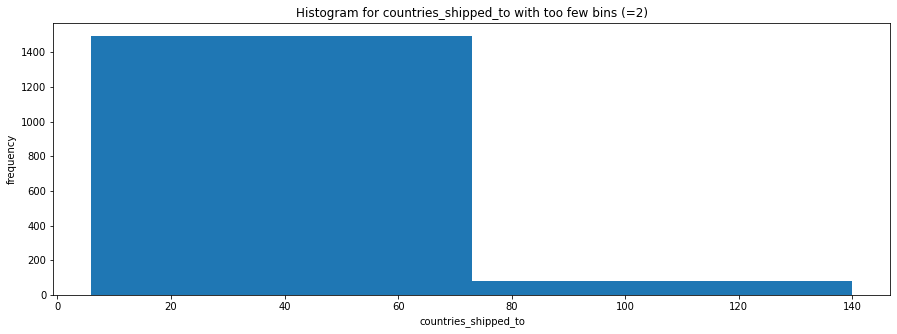

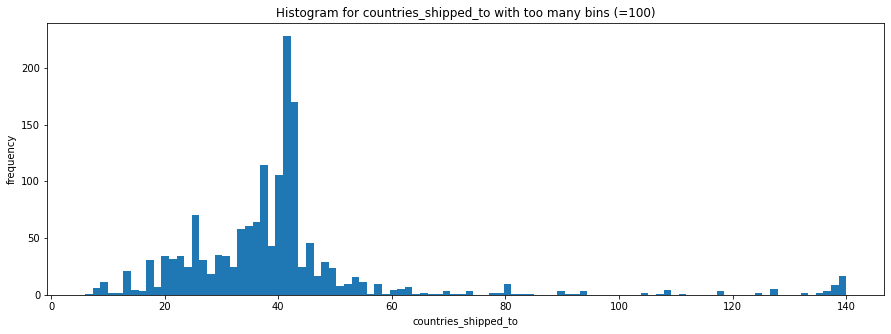

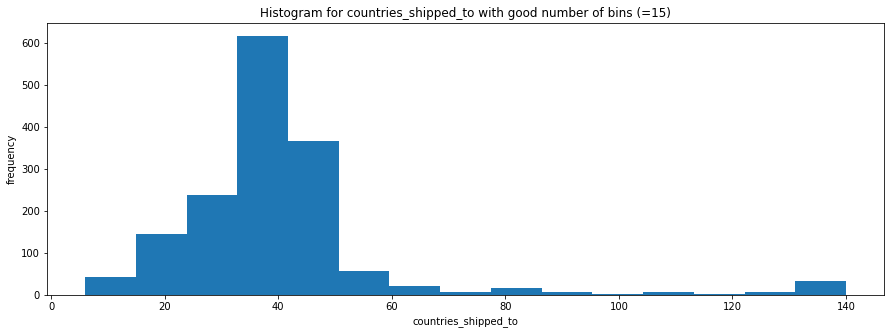

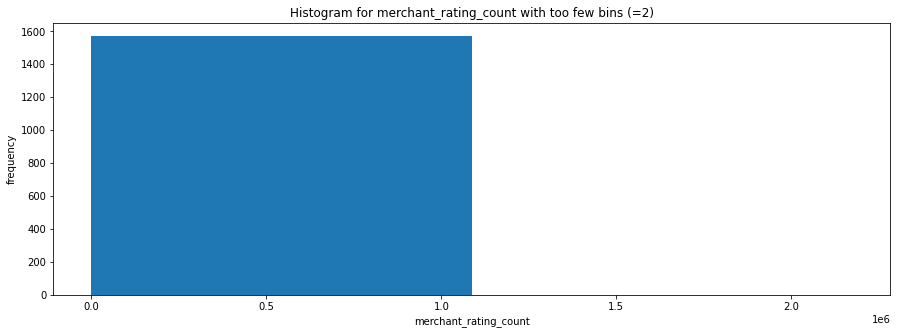

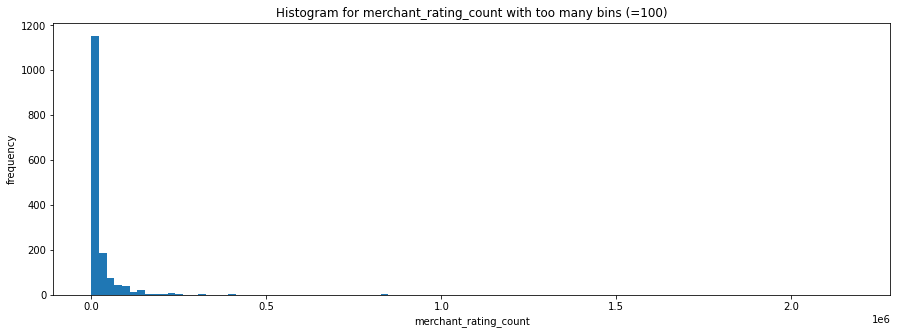

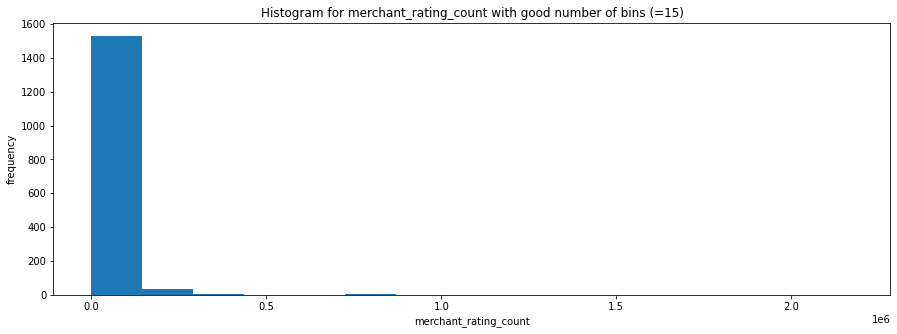

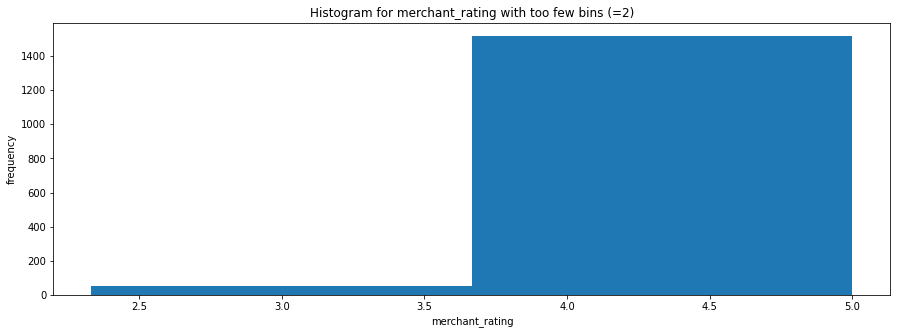

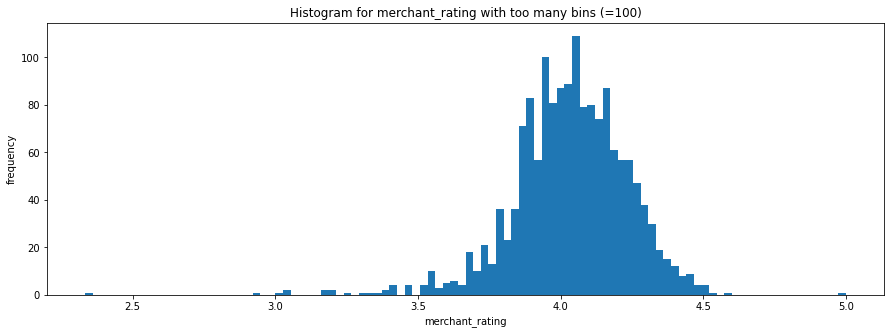

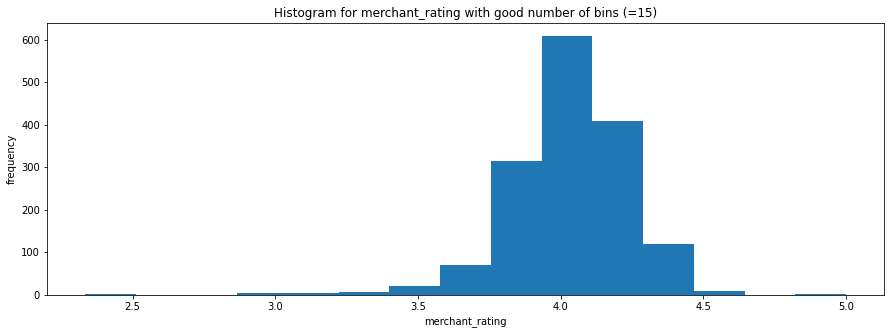

In [25]:
for var in cont_var:
    plt.figure(figsize=(15, 5))
    plt.hist(df[var],bins=2)
    plt.xlabel(var)
    plt.ylabel("frequency")
    plt.title("Histogram for " + var + " with too few bins (=2)")
    plt.show()

    plt.figure(figsize=(15, 5))
    plt.hist(df[var],bins=100)
    plt.xlabel(var)
    plt.ylabel("frequency")
    plt.title("Histogram for " + var + " with too many bins (=100)")
    plt.show()

    plt.figure(figsize=(15, 5))
    plt.hist(df[var],bins=15)
    plt.xlabel(var)
    plt.ylabel("frequency")
    plt.title("Histogram for " + var + " with good number of bins (=15)")
    plt.show()

## QQ-Plot to see deviation of variables

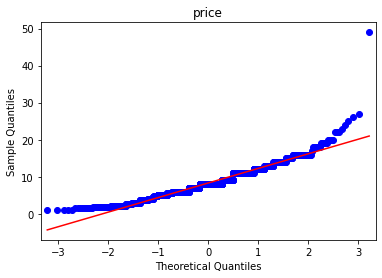

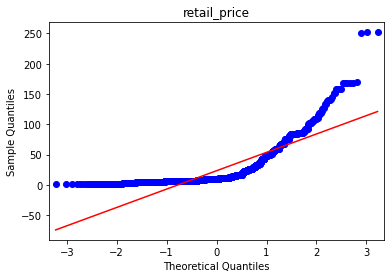

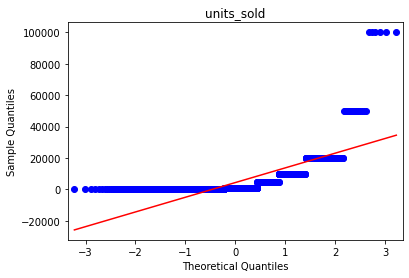

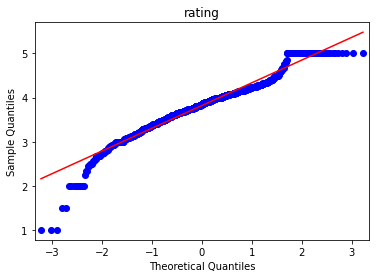

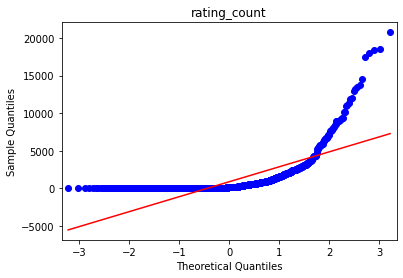

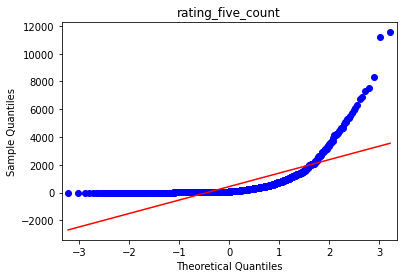

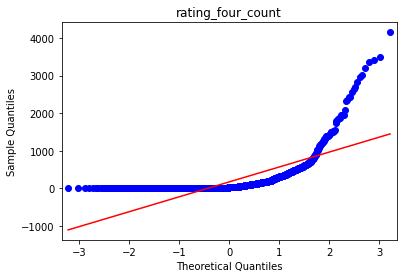

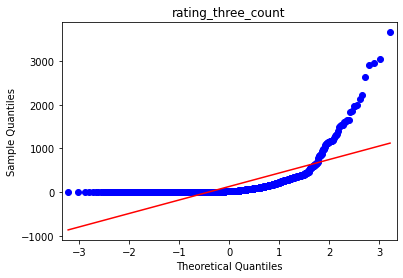

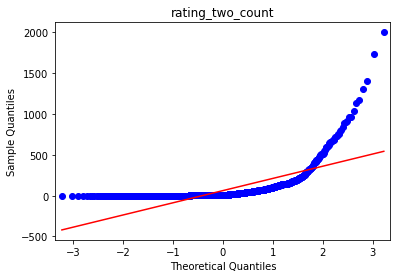

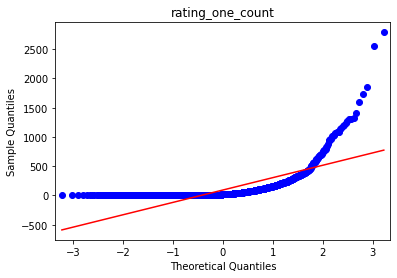

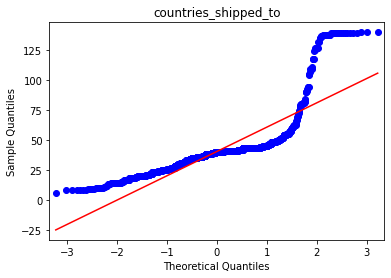

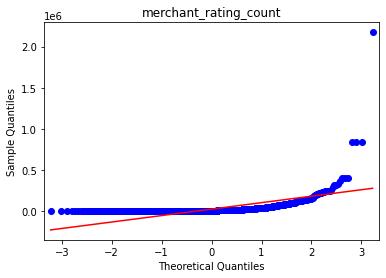

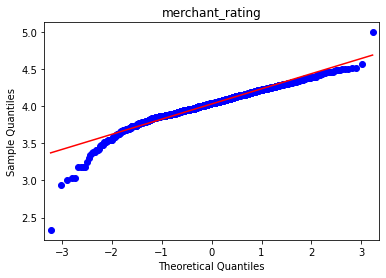

In [26]:
for var in cont_var:
  fig = sm.qqplot(df[var],line="s")
  plt.title(var)
  plt.show()

## From the above QQ-plots we can deduce the following about skewness of data:

1.) 'price': Slightly Right Skewed \\
2.) 'retail_price': Right Skewed \\
3.) 'units_sold':  Right Skewed \\
4.) 'rating': Almost Normally Distributed \\
5.) 'rating_count': Right Skewed \\
6.) 'rating_five_count': Right Skewed \\
7.) 'rating_four_count': Right Skewed \\
8.) 'rating_three_count': Right Skewed \\
9.) 'rating_two_count': Right Skewed \\
10.) 'rating_one_count': Right Skewed \\
11.) 'countries_shipped_to': Right Skewed \\
12.) 'merchant_rating_count':  Right Skewed \\
13.) 'merchant_rating': Almost Normally Distributed \\

## Checking if variable deviates is log-normal

This is done by plotting the qq plots of the log of the variables 
A small delta (= 10^(-7)) is introduced to avoid non-finite errors if the variable attains value 0

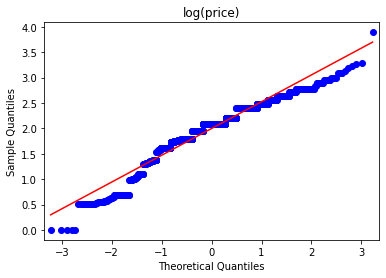

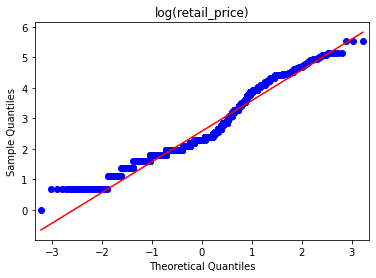

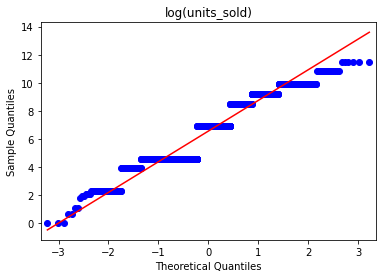

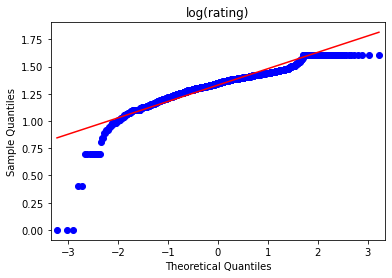

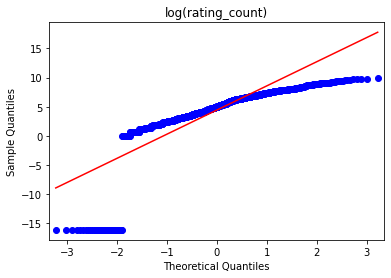

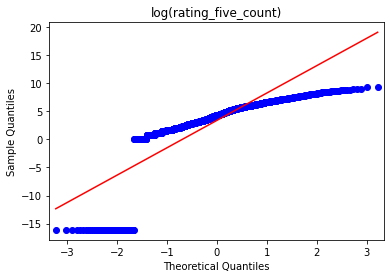

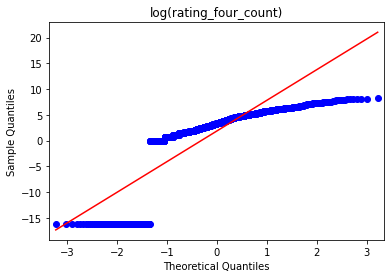

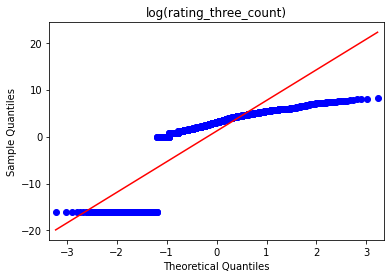

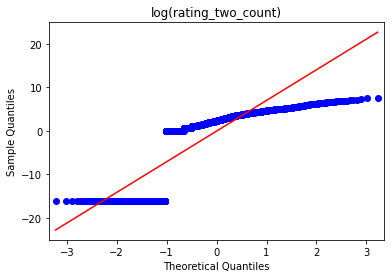

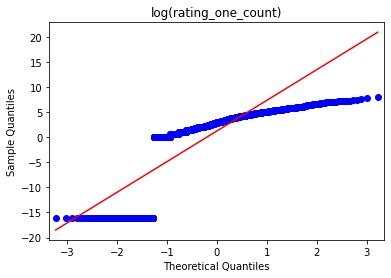

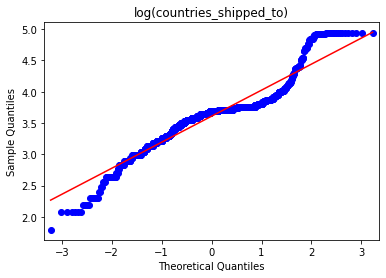

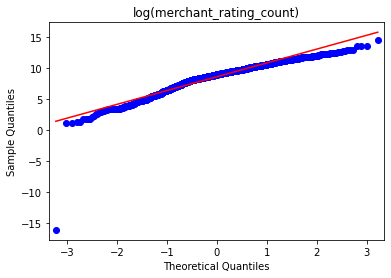

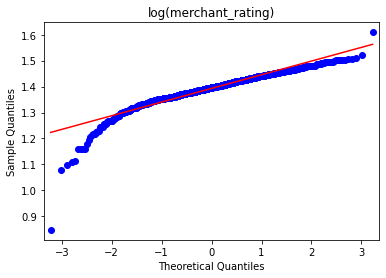

In [27]:
delta = 0.0000001
for var in cont_var:
  fig = sm.qqplot(np.log(df[var] + delta), line="s")
  plt.title("log("+var+")")
  plt.show()


From the above plots we can conclude the following:

1.) 'price': log-normal \\
2.) 'retail_price': log-normal \\
3.) 'units_sold':  not log-normal \\
4.) 'rating': log-normal \\
5.) 'rating_count': not log-normal \\
6.) 'rating_five_count': not log-normal \\
7.) 'rating_four_count': not log-normal \\
8.) 'rating_three_count': not log-normal \\
9.) 'rating_two_count': not log-normal \\
10.) 'rating_one_count': not log-normal \\
11.) 'countries_shipped_to': not log-normal \\
12.) 'merchant_rating_count':  log-normal \\
13.) 'merchant_rating': log-normal \\


# Pairwise Interaction

We take the following two pairs of discrete-continuous variables.
 
(i.) 'product_color' - 'price' 

(ii.) 'product_variation_size_id' - 'rating'

### 'product_color' - 'price'

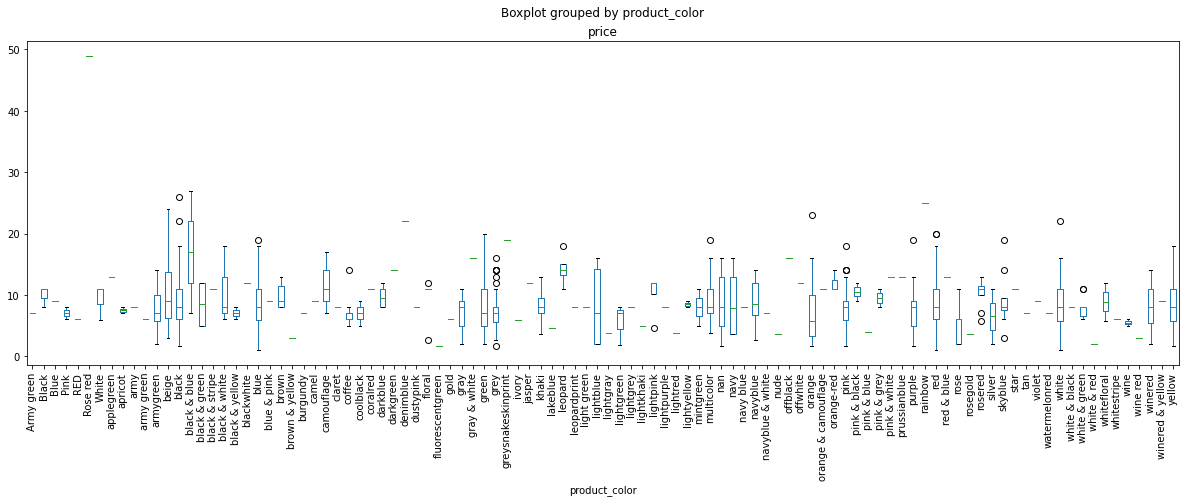

In [28]:
df.boxplot(by='product_color', column='price',grid=False,rot=90, figsize=(20, 6))
# plt.figure(figsize=(30,10))
plt.show()

### 'product_variation_size_id' - 'rating'

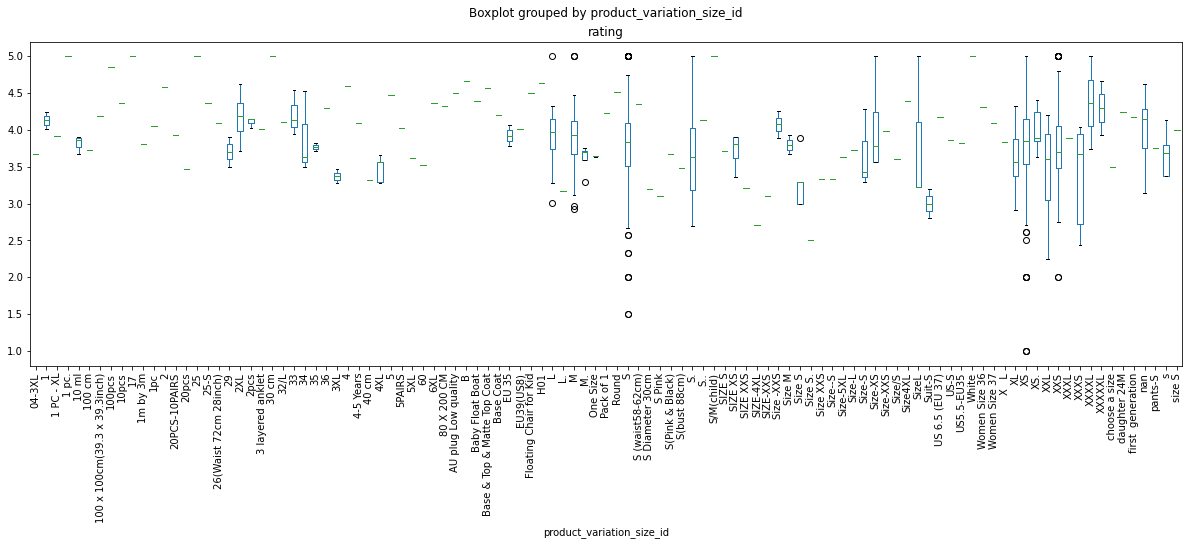

In [29]:
df.boxplot(by='product_variation_size_id', column='rating',grid=False,rot=90, figsize=(20,6))
# plt.figure(figsize=(15,10))
plt.show()

## Heatmap of correlation between all pairs of continuous variables

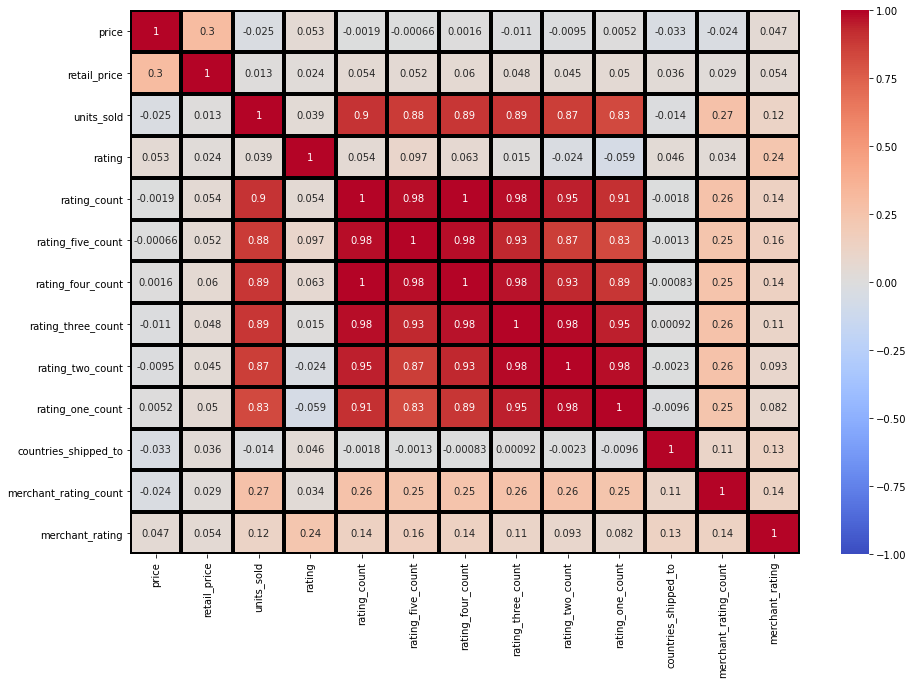

In [30]:
plt.subplots(figsize=(15, 10))
sns.heatmap(df[cont_var].corr(),annot=True,vmin=-1, vmax=1, center= 0,cmap= 'coolwarm', linewidths=3, linecolor='black')

# Creative Part

Plotting scatter plot for 'price' vs 'units_sold' 

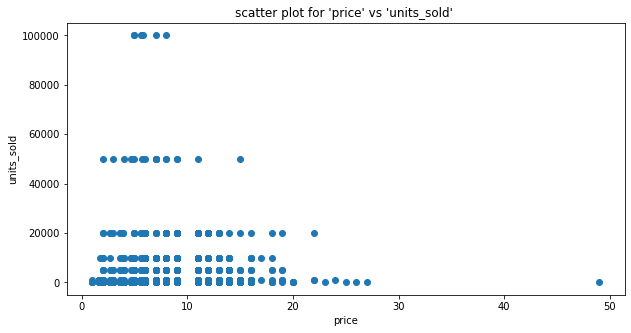

In [31]:
plt.figure(figsize=(10,5))
plt.title("scatter plot for 'price' vs 'units_sold' ")
plt.xlabel("price")
plt.ylabel("units_sold")
plt.scatter(df["price"],df["units_sold"])
plt.show()

From the above scatter plot it can be observed that the points are in horizontal and vertical lines. This is supported by the quantized nature of the variables.